In [ ]:
## Notebook env: brian_script_env (R kernel)
## quantify frequency of guides in top 10% of increasing or decreasing CV across 10 random seeds of cell sampling

In [1]:
library(dplyr)
library(ggplot2)
library(ggrepel)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
adata.R = readRDS('/home/ssobti/projects/mir_tud/101423_filtered_data/miR_normalized_integrated_seurat.rds')
seed1 = read.csv('/home/ssobti/projects/mir_tud/output_data/heterogeneity/updated_input_data/CV_gene_median_aboveorequalto1_seed1_metric_change_df.csv')
seed2 = read.csv('/home/ssobti/projects/mir_tud/output_data/heterogeneity/updated_input_data/CV_gene_median_aboveorequalto1_seed2_metric_change_df.csv')
seed3 = read.csv('/home/ssobti/projects/mir_tud/output_data/heterogeneity/updated_input_data/CV_gene_median_aboveorequalto1_seed3_metric_change_df.csv')
seed4 = read.csv('/home/ssobti/projects/mir_tud/output_data/heterogeneity/updated_input_data/CV_gene_median_aboveorequalto1_seed4_metric_change_df.csv')
seed5 = read.csv('/home/ssobti/projects/mir_tud/output_data/heterogeneity/updated_input_data/CV_gene_median_aboveorequalto1_seed5_metric_change_df.csv')
seed6 = read.csv('/home/ssobti/projects/mir_tud/output_data/heterogeneity/updated_input_data/CV_gene_median_aboveorequalto1_seed6_metric_change_df.csv')
seed7 = read.csv('/home/ssobti/projects/mir_tud/output_data/heterogeneity/updated_input_data/CV_gene_median_aboveorequalto1_seed7_metric_change_df.csv')
seed8 = read.csv('/home/ssobti/projects/mir_tud/output_data/heterogeneity/updated_input_data/CV_gene_median_aboveorequalto1_seed8_metric_change_df.csv')
seed9 = read.csv('/home/ssobti/projects/mir_tud/output_data/heterogeneity/updated_input_data/CV_gene_median_aboveorequalto1_seed9_metric_change_df.csv')
seed10 = read.csv('/home/ssobti/projects/mir_tud/output_data/heterogeneity/updated_input_data/CV_gene_median_aboveorequalto1_seed10_metric_change_df.csv')

In [3]:
combined_df = list(seed1, seed2, seed3, seed4, seed5, seed6, seed7, seed8, seed9, seed10)
names(combined_df) = c('seed1', 'seed2', 'seed3', 'seed4', 'seed5', 'seed6', 'seed7', 'seed8', 'seed9', 'seed10')
combined_df = bind_rows(seed1, seed2, seed3, seed4, seed5, seed6, seed7, seed8, seed9, seed10, .id = 'seed') 

top_increasing_CV_guides = combined_df %>% group_by(seed) %>% filter(increasing_CV_genes > quantile(increasing_CV_genes, 0.9)) %>% pull(guide) %>% as.character()
top_decreasing_CV_guides = combined_df %>% group_by(seed) %>% filter(decreasing_CV_genes > quantile(decreasing_CV_genes, 0.9)) %>% pull(guide) %>% as.character()
top_increasing_CV_guides = table(top_increasing_CV_guides) %>% as.data.frame %>% arrange(-Freq) %>% head(10)
top_decreasing_CV_guides = table(top_decreasing_CV_guides) %>% as.data.frame %>% arrange(-Freq) %>% head(10)

## add number of cells in each guide
adata.R@meta.data %>% group_by(miR.family) %>% summarise(n = n()) -> n_cells
top_increasing_CV_guides$cells = 0
top_decreasing_CV_guides$cells = 0
top_increasing_CV_guides$top_increasing_CV_guides = as.character(top_increasing_CV_guides$top_increasing_CV_guides)
top_decreasing_CV_guides$top_decreasing_CV_guides = as.character(top_decreasing_CV_guides$top_decreasing_CV_guides)

for (i in 1:10){
    top_increasing_CV_guides$cells[i] = n_cells$n[n_cells$miR.family == ifelse(startsWith(top_increasing_CV_guides$top_increasing_CV_guides[i], 'random_'), gsub('random_', '', top_increasing_CV_guides$top_increasing_CV_guides[i]), top_increasing_CV_guides$top_increasing_CV_guides[i])]
    top_decreasing_CV_guides$cells[i] = n_cells$n[n_cells$miR.family == ifelse(startsWith(top_decreasing_CV_guides$top_decreasing_CV_guides[i], 'random_'), gsub('random_', '', top_decreasing_CV_guides$top_decreasing_CV_guides[i]), top_decreasing_CV_guides$top_decreasing_CV_guides[i])]
}

colnames(top_increasing_CV_guides)[2:3] = c('Freq in top 10% across 10 random starts', 'cells_before_equal_cell_sampling')
colnames(top_decreasing_CV_guides)[2:3] = c('Freq in top 10% across 10 random starts', 'cells_before_equal_cell_sampling')


In [4]:
top_increasing_CV_guides

,top_increasing_CV_guides,Freq in top 10% across 10 random starts,cells_before_equal_cell_sampling
,<chr>,<int>,<dbl>
1,miR-214-3p/3619-5p,8,85
2,miR-615-3p,8,60
3,let-7d-3p,7,49
4,miR-219a-1-3p,7,78
5,miR-361-3p,7,54
6,miR-582-3p,7,60
7,miR-1343-3p,6,141
8,miR-34b-3p,6,106
9,miR-99-3p,6,71


In [5]:
top_decreasing_CV_guides

,top_decreasing_CV_guides,Freq in top 10% across 10 random starts,cells_before_equal_cell_sampling
,<chr>,<int>,<dbl>
1,miR-378a-5p,3,63
2,random_miR-548ay-5p/548au-5p/548as-5p/548ar-5p/548aq-5p/548ap-5p/548am-5p/548ae-5p/548ad-5p/548a-5p/548ak/548ab/548bb-5p/548b-5p/548c-5p/548d-5p/548h-5p/548i/548j-5p/548o-5p/548w/548y/559,3,145
3,random_miR-598-3p,3,47
4,random_miR-612/1285-3p/3187-5p/5189-5p/6860,3,95
5,random_miR-628-5p,3,64
6,hsa-miR-9903,2,78
7,let-7a-2-3p/let-7g-3p,2,59
8,miR-1226-3p,2,68
9,miR-125-5p,2,121


In [6]:
write.csv(top_increasing_CV_guides, '/home/ssobti/projects/mir_tud/output_data/heterogeneity/updated_input_data/CV_gene_median_aboveorequalto1_seeds_combined_top_increasing_CV_guides.csv')
write.csv(top_decreasing_CV_guides, '/home/ssobti/projects/mir_tud/output_data/heterogeneity/updated_input_data/CV_gene_median_aboveorequalto1_seeds_combined_top_decreasing_CV_guides.csv')

In [7]:
increasing_CV_guides = combined_df %>% group_by(seed) %>% filter(increasing_CV_genes > quantile(increasing_CV_genes, 0.9)) %>% pull(guide) %>% as.character() %>% table() %>% as.data.frame %>% arrange(-Freq)
colnames(increasing_CV_guides)[1:2] = c('guide', 'Freq in top 10% across 10 random starts')
increasing_CV_guides$proportion = increasing_CV_guides$`Freq in top 10% across 10 random starts`/sum(increasing_CV_guides$`Freq in top 10% across 10 random starts`)
increasing_CV_guides$cumulative_proportion = cumsum(increasing_CV_guides$proportion)
increasing_CV_guides = increasing_CV_guides %>% arrange(-`Freq in top 10% across 10 random starts`)
increasing_CV_guides$type = ifelse(startsWith(as.character(increasing_CV_guides$guide), 'random_'), 'random', 'guide')

decreasing_CV_guides = combined_df %>% group_by(seed) %>% filter(decreasing_CV_genes > quantile(decreasing_CV_genes, 0.9)) %>% pull(guide) %>% as.character() %>% table() %>% as.data.frame %>% arrange(-Freq)
colnames(decreasing_CV_guides)[1:2] = c('guide', 'Freq in top 10% across 10 random starts')
decreasing_CV_guides$proportion = decreasing_CV_guides$`Freq in top 10% across 10 random starts`/sum(decreasing_CV_guides$`Freq in top 10% across 10 random starts`)
decreasing_CV_guides$cumulative_proportion = cumsum(decreasing_CV_guides$proportion)
decreasing_CV_guides = decreasing_CV_guides %>% arrange(-`Freq in top 10% across 10 random starts`)
decreasing_CV_guides$type = ifelse(startsWith(as.character(decreasing_CV_guides$guide), 'random_'), 'random', 'guide')

head(increasing_CV_guides)
head(decreasing_CV_guides)

,guide,Freq in top 10% across 10 random starts,proportion,cumulative_proportion,type
,<fct>,<int>,<dbl>,<dbl>,<chr>
1,miR-214-3p/3619-5p,8,0.01518027,0.01518027,guide
2,miR-615-3p,8,0.01518027,0.03036053,guide
3,let-7d-3p,7,0.01328273,0.04364326,guide
4,miR-219a-1-3p,7,0.01328273,0.05692600,guide
5,miR-361-3p,7,0.01328273,0.07020873,guide
6,miR-582-3p,7,0.01328273,0.08349146,guide


,guide,Freq in top 10% across 10 random starts,proportion,cumulative_proportion,type
,<fct>,<int>,<dbl>,<dbl>,<chr>
1,miR-378a-5p,3,0.010869565,0.01086957,guide
2,random_miR-548ay-5p/548au-5p/548as-5p/548ar-5p/548aq-5p/548ap-5p/548am-5p/548ae-5p/548ad-5p/548a-5p/548ak/548ab/548bb-5p/548b-5p/548c-5p/548d-5p/548h-5p/548i/548j-5p/548o-5p/548w/548y/559,3,0.010869565,0.02173913,random
3,random_miR-598-3p,3,0.010869565,0.03260870,random
4,random_miR-612/1285-3p/3187-5p/5189-5p/6860,3,0.010869565,0.04347826,random
5,random_miR-628-5p,3,0.010869565,0.05434783,random
6,hsa-miR-9903,2,0.007246377,0.06159420,guide


## Graphs

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.2     ✔ purrr   0.3.4
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



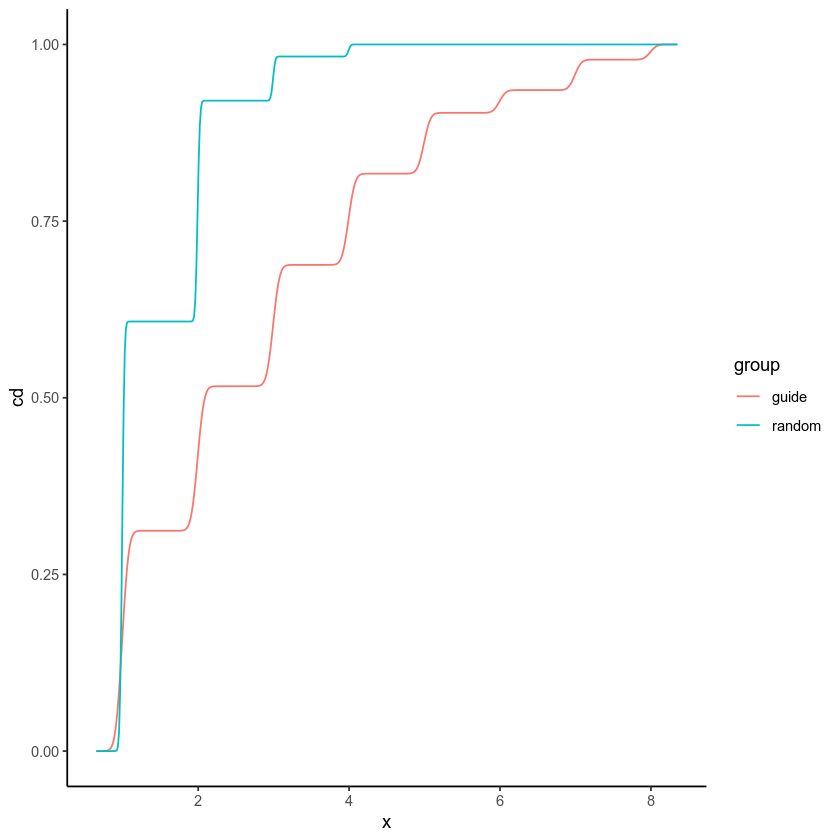

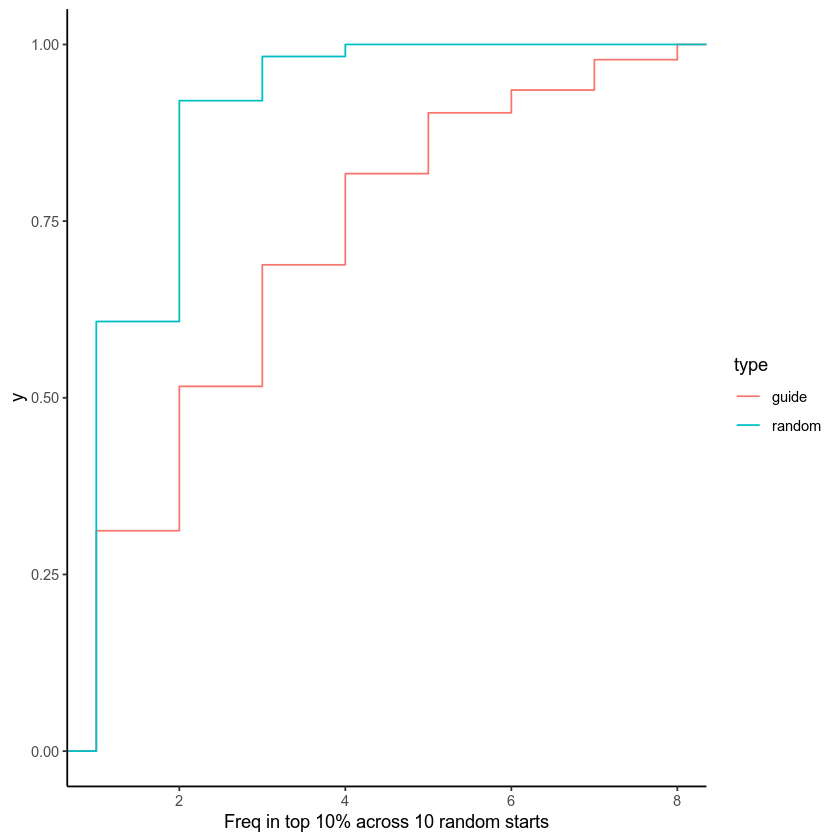

In [8]:
## ecdf of increasing CV guides
## draw smooth ecdf graphs
library(tidyverse)            
dat = increasing_CV_guides
dat$x = dat$`Freq in top 10% across 10 random starts`
dat$group = dat$type


# Split the data by group and calculate the smoothed cumulative density for each group
dens = split(dat, dat$group) %>% 
  map_df(function(d) {
    dens = density(d$x, adjust=0.1, from=min(dat$x) - 0.05*diff(range(dat$x)), 
                   to=max(dat$x) + 0.05*diff(range(dat$x)))
    data.frame(x=dens$x, y=dens$y, cd=cumsum(dens$y)/sum(dens$y), group=d$group[1])
  })

## smooth ecdf
ggplot() +
  geom_line(data=dens, aes(x, cd, color=group)) + scale_color_hue(direction = 1) +
  theme_classic()

## rough step ecdf
ggplot(increasing_CV_guides, aes(`Freq in top 10% across 10 random starts`, color = type)) + stat_ecdf(geom = "step") + scale_color_hue(direction = 1) + theme_classic()

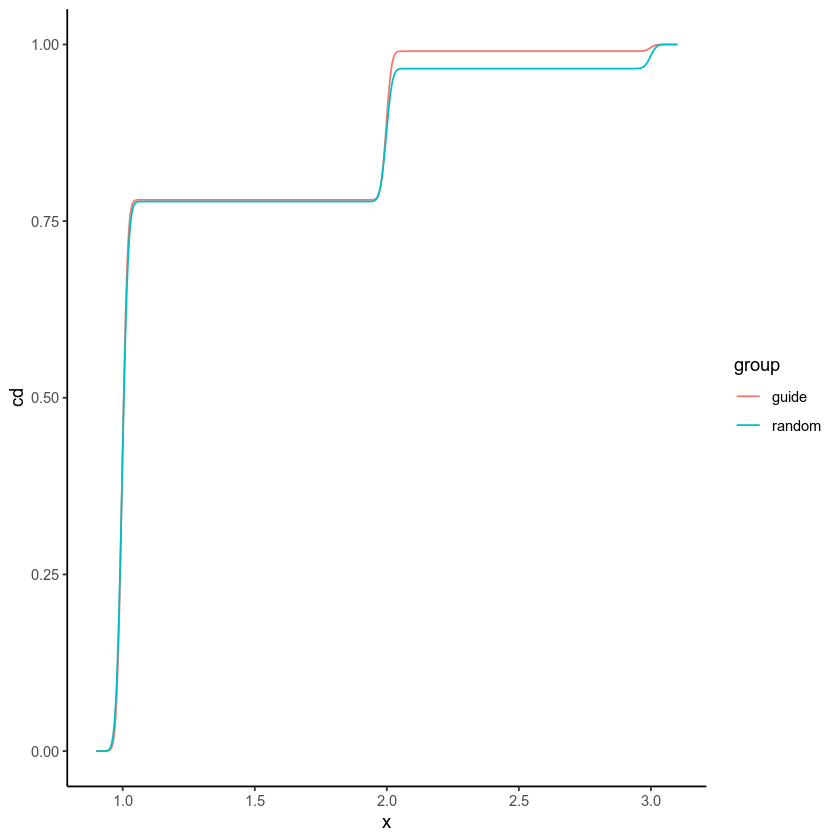

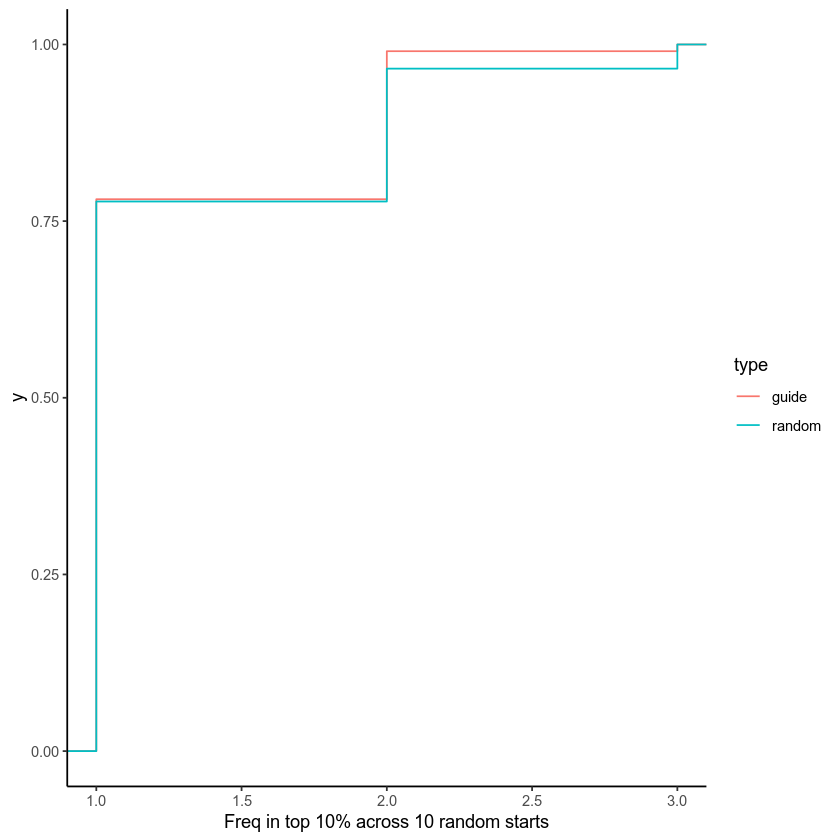

In [9]:
## ecdf of decreasing CV guides
## draw smooth ecdf graphs         
dat = decreasing_CV_guides
dat$x = dat$`Freq in top 10% across 10 random starts`
dat$group = dat$type


# Split the data by group and calculate the smoothed cumulative density for each group
dens = split(dat, dat$group) %>% 
  map_df(function(d) {
    dens = density(d$x, adjust=0.1, from=min(dat$x) - 0.05*diff(range(dat$x)), 
                   to=max(dat$x) + 0.05*diff(range(dat$x)))
    data.frame(x=dens$x, y=dens$y, cd=cumsum(dens$y)/sum(dens$y), group=d$group[1])
  })

## smooth ecdf
ggplot() +
  geom_line(data=dens, aes(x, cd, colour=group)) + scale_color_hue(direction = 1) +
  theme_classic()

## rough step ecdf
ggplot(decreasing_CV_guides, aes(`Freq in top 10% across 10 random starts`, color = type)) + scale_color_hue(direction = 1) + stat_ecdf(geom = "step") + theme_classic()

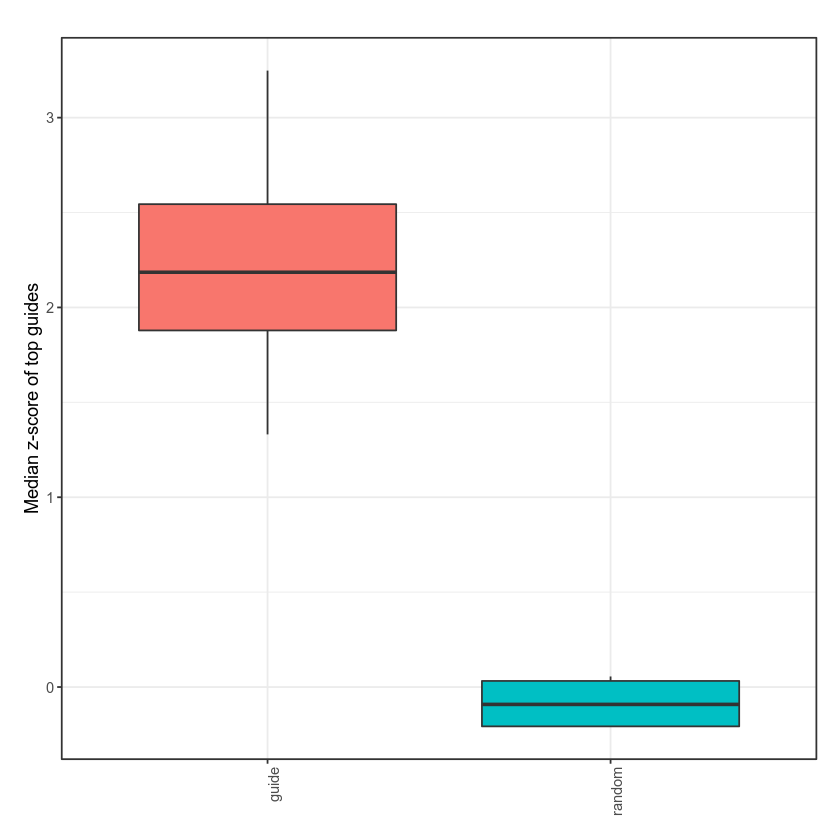

In [10]:
## plot median z-scores of top guides selected above
## median of top guides vs top random guides
top_increasing_CV_guides_full = combined_df %>% group_by(seed) %>% dplyr::filter(increasing_CV_genes > quantile(increasing_CV_genes, 0.9)) %>% pull(guide) %>% as.character() %>% table() %>% as.data.frame %>% arrange(-Freq)
colnames(top_increasing_CV_guides_full)[1:2] = c('guide', 'Freq in top 10% across 10 random starts')
top_increasing_CV_guides_full$guide = as.character(top_increasing_CV_guides_full$guide)
top_decreasing_CV_guides_full = combined_df %>% group_by(seed) %>% dplyr::filter(decreasing_CV_genes > quantile(decreasing_CV_genes, 0.9)) %>% pull(guide) %>% as.character() %>% table() %>% as.data.frame %>% arrange(-Freq)
colnames(top_decreasing_CV_guides_full)[1:2] = c('guide', 'Freq in top 10% across 10 random starts')
top_decreasing_CV_guides_full$guide = as.character(top_decreasing_CV_guides_full$guide)
top_guides_medians_increasing_CV = combined_df %>% dplyr::filter(guide %in% top_increasing_CV_guides_full$guide[!startsWith(top_increasing_CV_guides_full$guide, 'random_')][1:4]) %>% group_by(guide) %>% summarize(median_z_score_increasing_genes = median(z_score_increasing_genes))
top_randoms_medians_increasing_CV = combined_df %>% dplyr::filter(guide %in% top_increasing_CV_guides_full$guide[startsWith(top_increasing_CV_guides_full$guide, 'random_')][1:4]) %>% group_by(guide) %>% summarize(median_z_score_increasing_genes = median(z_score_increasing_genes))
top_guides_medians_increasing_CV = bind_rows(top_guides_medians_increasing_CV %>% mutate(group = "guide"), top_randoms_medians_increasing_CV %>% mutate(group = "random"))

## median z-scores of top guides (4) above first randomized guide and top 4 randomized guides
ggplot(top_guides_medians_increasing_CV, aes(x = group, y = median_z_score_increasing_genes, fill = group)) +
  geom_boxplot() + theme_bw() + theme(axis.text.x = element_text(angle = 90, hjust = 1), plot.title = element_text(hjust = 0.5, margin = margin(0,0,12,0)), plot.margin = unit(c(0.8, 0.5, 0.5, 0.5), 'cm'),
    axis.title.x = element_blank(), legend.position = 'none') + ylab('Median z-score of top guides') + coord_cartesian(clip = 'off')


Warning message:
“ggrepel: 1306 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


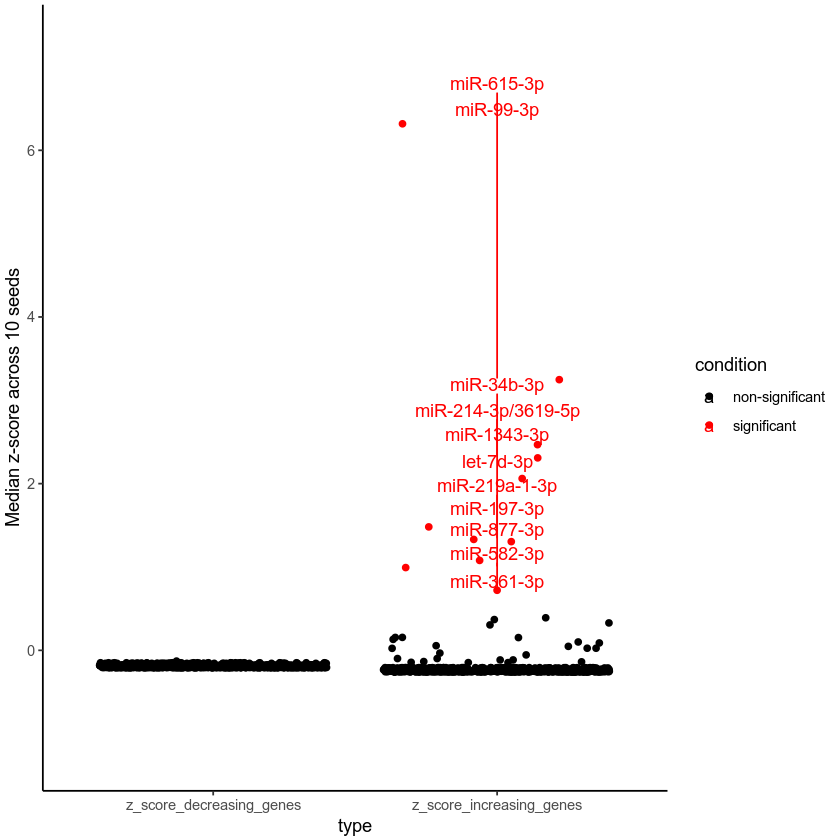

In [11]:
options(repr.plot.width = 7, repr.plot.height = 7)
## find median z-scores for heterogeniety across the 10 random seeds
median_z_scores = combined_df %>% group_by(guide) %>% summarize(z_score_increasing_genes = median(z_score_increasing_genes), z_score_decreasing_genes = median(z_score_decreasing_genes))
median_z_scores_long = median_z_scores %>% pivot_longer(cols = c(z_score_increasing_genes, z_score_decreasing_genes), names_to = 'type', values_to = 'median_z_score')
median_z_scores_long$condition = ifelse(abs(median_z_scores_long$median_z_score) > 0.5, 'significant', 'non-significant')
saveRDS(median_z_scores_long, '/home/ssobti/projects/mir_tud/fig_output/data/fig3/miR_median_z_scores_long.rds')

ggplot(median_z_scores_long, aes(x = type, y = median_z_score, color = condition)) + geom_jitter() + geom_text_repel(aes(y = median_z_score, x = type, label = guide), direction = "y") + theme_classic() + scale_color_manual(values = c('significant' = 'red', 'non-significant' = 'black')) +
ylab('Median z-score across 10 seeds') + coord_cartesian(clip = 'off') + ylim(min(median_z_scores_long$median_z_score) - 1, max(median_z_scores_long$median_z_score) + 1) + theme(plot.margin = margin(0.1, 0.1, 0.1, 0.1, "cm"))

Warning message:
“ggrepel: 1307 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


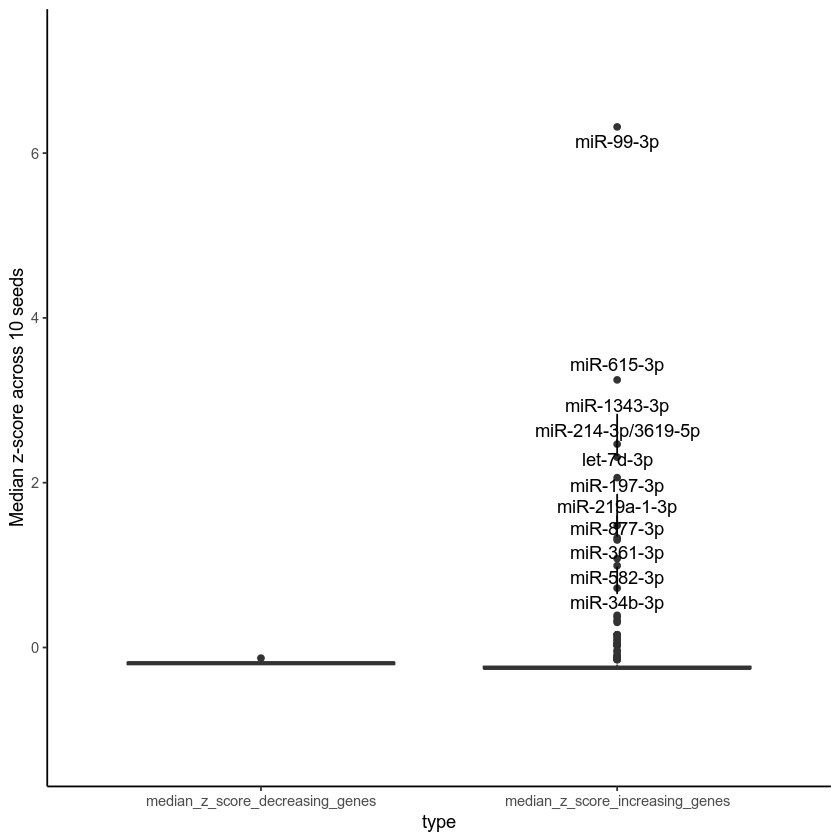

In [27]:
## find median z-scores for heterogeniety across the 10 random seeds
median_z_scores = combined_df %>% group_by(guide) %>% summarize(median_z_score_increasing_genes = median(z_score_increasing_genes), median_z_score_decreasing_genes = median(z_score_decreasing_genes))
median_z_scores_long = median_z_scores %>% pivot_longer(cols = c(median_z_score_increasing_genes, median_z_score_decreasing_genes), names_to = 'type', values_to = 'median_z_score')

ggplot(median_z_scores_long, aes(x = type, y = median_z_score)) + geom_boxplot() + geom_text_repel(aes(y = median_z_score, x = type, label = guide), direction = "y") + theme_classic() + 
ylab('Median z-score across 10 seeds') + coord_cartesian(clip = 'off') + ylim(min(median_z_scores_long$median_z_score) - 1, max(median_z_scores_long$median_z_score) + 1)